# ANALISIS DEL JUGADOR DE LA SELECCION UNAB RUZI(ADC)🧀
# Especficamente con el uso del campeon Kai'sa
We start by showing the daaaaata :)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
!pip install statsmodels

In [45]:
!pip install wquantiles

In [2]:
import pandas as pd # Manipulacion y analisis de datos
import numpy as np # Calculos matematicos
import matplotlib.pyplot as plt
import seaborn as sns # Graficas bonitas
import scipy.stats as stats

In [53]:
from scipy.stats import trim_mean
from statsmodels import robust

In [22]:
daRoute = "/content/drive/MyDrive/Proyecto_CienciaDeDatos/dataset_Ruzi.csv"
df = pd.read_csv(daRoute) #Mostrar mi data set
df.head(25)

,champion,spell_1,spell_2,win / lose (1/0),durationG(min),cs,cs/min,first item,kills,deaths,assists,vision points,ally support,enemy support,enemy adc,patch
0,kai sa,flash,purification,0,"29,12",157,"5,391483516",statik shyv,9,9,8,0,0,0,0,0
1,kai sa,flash,purification,0,"42,09",253,"6,010928962",statik shyv,22,8,9,0,0,0,0,0
2,kai sa,flash,barrier,1,"33,32",213,"6,392557023",statik shyv,20,4,18,0,0,0,0,0
3,kai sa,flash,purification,0,"17,34",130,"7,497116494",statik shyv,2,7,8,0,0,0,0,0
4,kai sa,flash,purification,1,"21,1",140,"6,63507109",kraken slayer,8,3,6,0,0,0,0,0
5,kai sa,flash,barrier,0,"24,25",159,"6,556701031",statik shyv,4,1,1,0,0,0,0,0
6,kai sa,flash,purification,0,"34,12",223,"6,535756155",kraken slayer,12,7,7,0,0,0,0,0
7,kai sa,flash,barrier,1,"27,34",227,"8,302852963",kraken slayer,13,4,8,0,0,0,0,0
8,kai sa,flash,heal,0,"26,59",211,"7,935314028",kraken slayer,11,6,2,0,0,0,0,0
9,kai sa,flash,purification,0,"31,27",194,"6,204029421",statik shyv,12,7,6,0,0,0,0,0


In [31]:
df.info() # Muestra informacion de mi data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   champion          25 non-null     object
 1   spell_1           25 non-null     object
 2   spell_2           25 non-null     object
 3   win / lose (1/0)  25 non-null     int64 
 4   durationG(min)    25 non-null     object
 5   cs                25 non-null     int64 
 6   cs/min            25 non-null     object
 7   first item        25 non-null     object
 8   kills             25 non-null     int64 
 9   deaths            25 non-null     int64 
 10  assists           25 non-null     int64 
 11  vision points     25 non-null     int64 
 12  ally support      25 non-null     int64 
 13  enemy support     25 non-null     int64 
 14  enemy adc         25 non-null     int64 
 15  patch             25 non-null     int64 
dtypes: int64(10), object(6)
memory usage: 3.2+ KB


In [32]:
df.describe() # Muestra estadisticas de mi data set

,win / lose (1/0),cs,kills,deaths,assists,vision points,ally support,enemy support,enemy adc,patch
count,25.0,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.0,25.0,25.0
mean,0.4,193.760000,10.880000,5.080000,6.440000,0.0,0.0,0.0,0.0,0.0
std,0.5,38.517615,5.035871,2.289833,3.536477,0.0,0.0,0.0,0.0,0.0
min,0.0,130.000000,2.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,166.000000,8.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,194.000000,11.000000,5.000000,6.000000,0.0,0.0,0.0,0.0,0.0
75%,1.0,223.000000,13.000000,7.000000,8.000000,0.0,0.0,0.0,0.0,0.0
max,1.0,256.000000,22.000000,9.000000,18.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f'This has {len(df.columns)} categories:')
stra = ''
howManyBySide = 6
for i in range(len(df.columns)):
  stra += df.columns[i] + ', '
  if (i + 1) % howManyBySide == 0:
    stra += '\n'
print(stra)

This has 16 categories:
champion, spell_1, spell_2, win / lose (1/0), durationG(min), cs, 
cs/min, first item, kills, deaths, assists, vision points, 
ally support, enemy support, enemy adc, patch, 


In [ ]:
print(f'this dataset has {df.shape[1]} columns and {df.shape[0]} rows') # Mostramos cantidad de filas y columnas

this dataset has 16 columns and 25 rows


In [4]:
winRate = df['win / lose (1/0)'].value_counts()
winRate # Cuento especificamente la cantidad de victorias y derrotas  (0 = derrota; 1 = victoria)

,count
win / lose (1/0),
0,15
1,10


In [6]:
wR= (winRate[1] / winRate.sum()) * 100 # Con esto estoy calculando el porcentaje de victorias
print(f'Porcentaje de victorias: {wR:.2f}%')

Porcentaje de victorias: 40.00%


In [7]:
dR= (winRate[0] / winRate.sum()) * 100 # Con esto estoy calculando el porcentaje de victorias
print(f'Porcentaje de derrotas: {dR:.2f}%')

Porcentaje de derrotas: 60.00%


In [8]:
df['KDA'] = (df['kills'] + df['assists']) / df['deaths'].replace(0, 1)  # Reemplaza 0 en deaths con un 1
print(df[['kills', 'deaths', 'assists', 'KDA']]) #Muestro el KDA


    kills  deaths  assists        KDA
0       9       9        8   1.888889
1      22       8        9   3.875000
2      20       4       18   9.500000
3       2       7        8   1.428571
4       8       3        6   4.666667
5       4       1        1   5.000000
6      12       7        7   2.714286
7      13       4        8   5.250000
8      11       6        2   2.166667
9      12       7        6   2.571429
10      9       7        6   2.142857
11      6       1        4  10.000000
12      6       4        6   3.000000
13      8       0        3  11.000000
14     19       8        7   3.250000
15     15       5       12   5.400000
16     10       5        4   2.800000
17     12       5       10   4.400000
18     16       6        4   3.333333
19      2       6        5   1.166667
20     13       7        3   2.285714
21     12       5        6   3.600000
22     10       5        5   3.000000
23     11       3        9   6.666667
24     10       4        4   3.500000


In [69]:
np.average(df['KDA'], weights=df['KDA']) #Media ponderada
#

5.752536740170792

In [9]:
kda_by_result = df.groupby('win / lose (1/0)')['KDA'].agg(['mean', 'median', 'min', 'max']) #Estoy sacando el promedio (mean) y la mediana (median)
print(kda_by_result)

                      mean    median       min   max
win / lose (1/0)                                    
0                 2.796005  2.714286  1.166667   5.0
1                 6.266667  5.325000  3.250000  11.0


In [51]:
df['kills'].mean() #Tomar una feature


10.88

In [72]:
np.average(df['kills'], weights=df['kills'])
#

13.117647058823529

In [55]:
df['deaths'].mean() #Tomar una feature


5.08

In [70]:
np.average(df['deaths'], weights=df['deaths'])
#

6.070866141732283

In [58]:
df['assists'].mean() #Tomar una feature

6.44

In [71]:
np.average(df['assists'], weights=df['assists'])
#

8.304347826086957

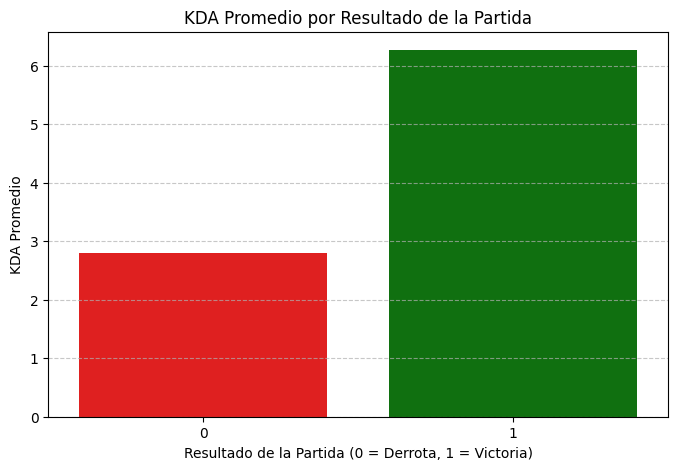

In [10]:
# Grafico usando seaborn
plt.figure(figsize=(8, 5)) # Establece el tamaño de la figura a 8 pulgadas de ancho y 5 pulgadas de alto
sns.barplot(data=df, x='win / lose (1/0)', y='KDA', hue='win / lose (1/0)', palette=['red', 'green'], errorbar=None, legend=False)# Coloco en X win/lose en Y kda
# Hue usa la misma columna para el color de las barras, diferenciando entre victorias y derrotas; palette define los colores para las barras (rojo para derrotas y verde para victorias)
plt.xlabel('Resultado de la Partida (0 = Derrota, 1 = Victoria)')
plt.ylabel('KDA Promedio')
plt.title('KDA Promedio por Resultado de la Partida')
plt.xticks(rotation=0)  # Estable la rotacion de las etiquetas del eje X de manera horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula horizontal con líneas discontinuas y un 70% de opacidad
plt.show()

In [11]:
# Agrupar el DataFrame por el resultado de la partida (win_lose) y calcular las estadísticas de CS para cada grupo
cs_by_result = df.groupby('win / lose (1/0)')['cs'].agg(['mean', 'median', 'min', 'max'])
print(cs_by_result)

                   mean  median  min  max
win / lose (1/0)                         
0                 195.4   194.0  130  256
1                 191.3   188.0  140  229


In [19]:
df['durationG(min)'] = df['durationG(min)'].str.replace(',', '.').astype(float)  # Convertir duración a flotantes
# Calcular CS por minuto
df['cs/min'] = df['cs'] / df['durationG(min)']
# Crear una nueva columna para indicar si la partida se ganó o perdió
df['win_lose'] = df['win / lose (1/0)']
# Agrupar el DataFrame por el resultado de la partida (win_lose) y calcular las estadísticas de CS por minuto para cada grupo
csmin_by_result = df.groupby('win_lose')['cs/min'].agg(['mean', 'median', 'min', 'max'])
# Imprimir los resultados
print(csmin_by_result)

              mean    median       min       max
win_lose                                        
0         6.868141  6.556701  5.391484  9.067642
1         7.319651  7.188512  5.857488  9.600925


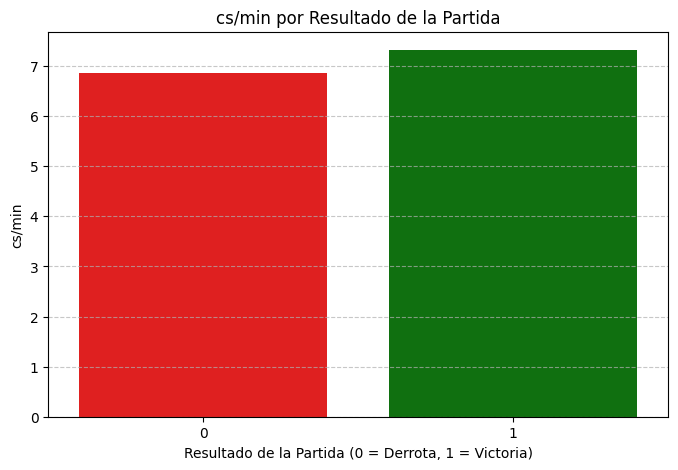

In [20]:
# Grafico usando seaborn
plt.figure(figsize=(8, 5)) # Establece el tamaño de la figura a 8 pulgadas de ancho y 5 pulgadas de alto
sns.barplot(data=df, x='win / lose (1/0)', y='cs/min', hue='win / lose (1/0)', palette=['red', 'green'], errorbar=None, legend=False)# Coloco en X win/lose en Y kda
# Hue usa la misma columna para el color de las barras, diferenciando entre victorias y derrotas; palette define los colores para las barras (rojo para derrotas y verde para victorias)
plt.xlabel('Resultado de la Partida (0 = Derrota, 1 = Victoria)')
plt.ylabel('cs/min')
plt.title('cs/min por Resultado de la Partida')
plt.xticks(rotation=0)  # Estable la rotacion de las etiquetas del eje X de manera horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula horizontal con líneas discontinuas y un 70% de opacidad
plt.show()

In [23]:
item1 = df['first item'].value_counts()
item1 # Cuento especificamente la cantidad de victorias y derrotas  (0 = derrota; 1 = victoria)

,count
first item,
kraken slayer,13
statik shyv,12


In [28]:
# Contar las victorias y derrotas para cada objeto
item_counts = df.groupby(['first item', 'win / lose (1/0)']).size().unstack(fill_value=0)
# Renombrar las columnas para mayor claridad
item_counts.columns = ['Derrotas', 'Victorias']
# Imprimir los resultados
print(item_counts)
# Calcular la tasa de victorias para cada objeto
item_counts['Tasa de Victorias (%)'] = (item_counts['Victorias'] / (item_counts['Victorias'] + item_counts['Derrotas'])) * 100
# Imprimir la tasa de victorias
print(item_counts[['Victorias', 'Derrotas', 'Tasa de Victorias (%)']])

               Derrotas  Victorias
first item                        
kraken slayer         7          6
statik shyv           8          4
               Victorias  Derrotas  Tasa de Victorias (%)
first item                                               
kraken slayer          6         7              46.153846
statik shyv            4         8              33.333333


<Figure size 1000x600 with 0 Axes>

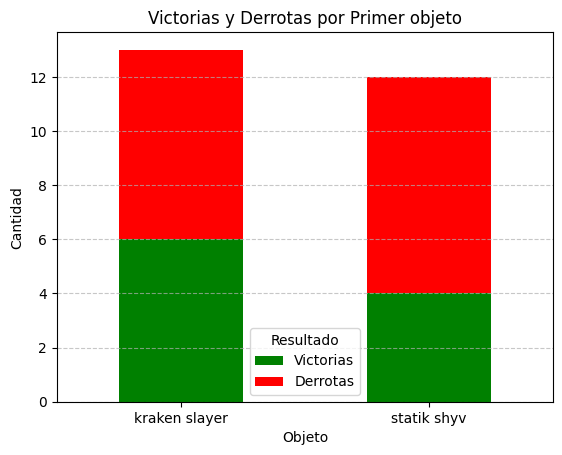

In [30]:
# Graficar
plt.figure(figsize=(10, 6))
item_counts[['Victorias', 'Derrotas']].plot(kind='bar', stacked=True, color=['green', 'red'])

# Personalizar el gráfico
plt.title('Victorias y Derrotas por Primer objeto')
plt.xlabel('Objeto')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.legend(title='Resultado', labels=['Victorias', 'Derrotas'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()